<a href="https://colab.research.google.com/github/RoseJaisil/Kaggle_competitions/blob/main/Kaggle_Project_Hacking_the_Human_Vasculature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset from Kaggle

In [1]:
!pip install -q kaggle

In [2]:
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.5 MB/s eta 0:00:00


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cvformedicalimages","key":"c53372d7356dcbba00a2cb57004ba9bf"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c hubmap-hacking-the-human-vasculature

100% 3.97G/3.97G [02:34<00:00, 28.0MB/s]
100% 3.97G/3.97G [02:34<00:00, 27.6MB/s]


In [8]:
!unzip hubmap-hacking-the-human-vasculature.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/48ab0c52f22d.tif  
  inflating: dataset/train/48ad170192e4.tif  
  inflating: dataset/train/48b535ee2927.tif  
  inflating: dataset/train/48bcefbaad54.tif  
  inflating: dataset/train/48bef102863d.tif  
  inflating: dataset/train/48c7d572535a.tif  
  inflating: dataset/train/48cd9932a544.tif  
  inflating: dataset/train/48e32a2aebc0.tif  
  inflating: dataset/train/48e425699e4f.tif  
  inflating: dataset/train/48ec8eca1796.tif  
  inflating: dataset/train/48f30bfa00ef.tif  
  inflating: dataset/train/48f47d8653f0.tif  
  inflating: dataset/train/48f6dc742c93.tif  
  inflating: dataset/train/48f802f35207.tif  
  inflating: dataset/train/48f91d6f20e5.tif  
  inflating: dataset/train/4912444e9531.tif  
  inflating: dataset/train/492dfe588aba.tif  
  inflating: dataset/train/492fe343acff.tif  
  inflating: dataset/train/494f112c4acf.tif  
  inflating: dataset/train/49501f8c9b59.tif  
  inflating: dataset/train/49

Explore Dataset

In [9]:
from skimage.io import imread,imsave,imshow
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import json
import imagecodecs
%matplotlib inline

In [10]:
with open("/content/dataset/polygons.jsonl") as f:
  data = f.read()
res = []
for file in data.splitlines():
  d = json.loads(file)
  res.append(d)

In [11]:
def get_cat_coordinates(coordinates):
  coords_array = np.array(coordinates).squeeze()
  xs = coords_array[:, 0]
  ys = coords_array[:, 1]

  return xs, ys


##### Let's view one image

In [12]:
d = res[500]
image_id = d["id"]
path = f"/content/dataset/train/{image_id}.tif"
img = imread(path)

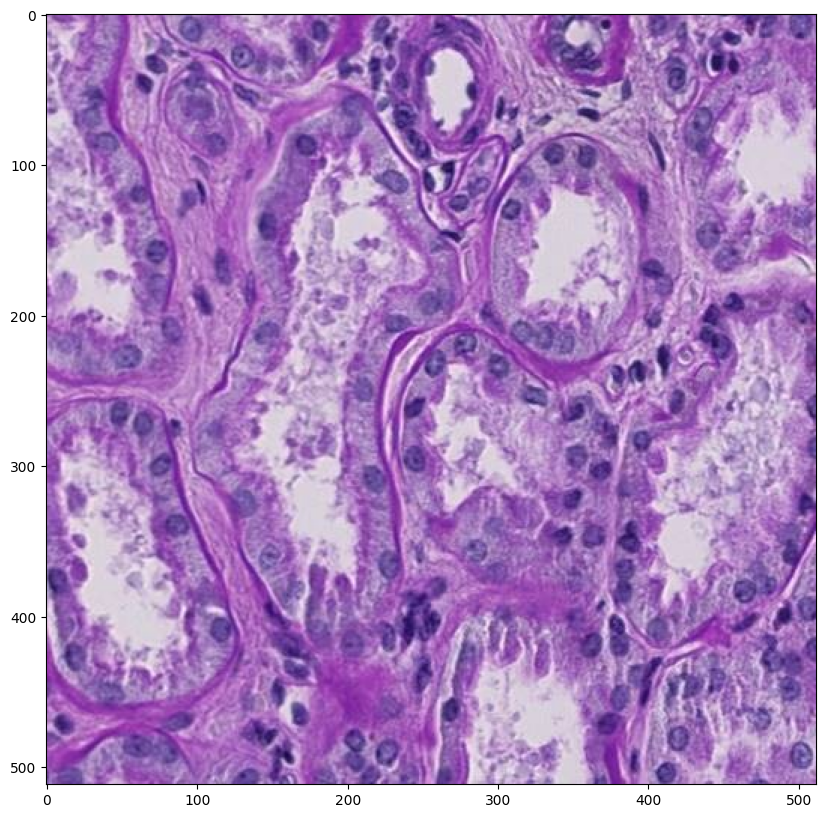

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(img)
fig.show()

#### Visualize using the annotations

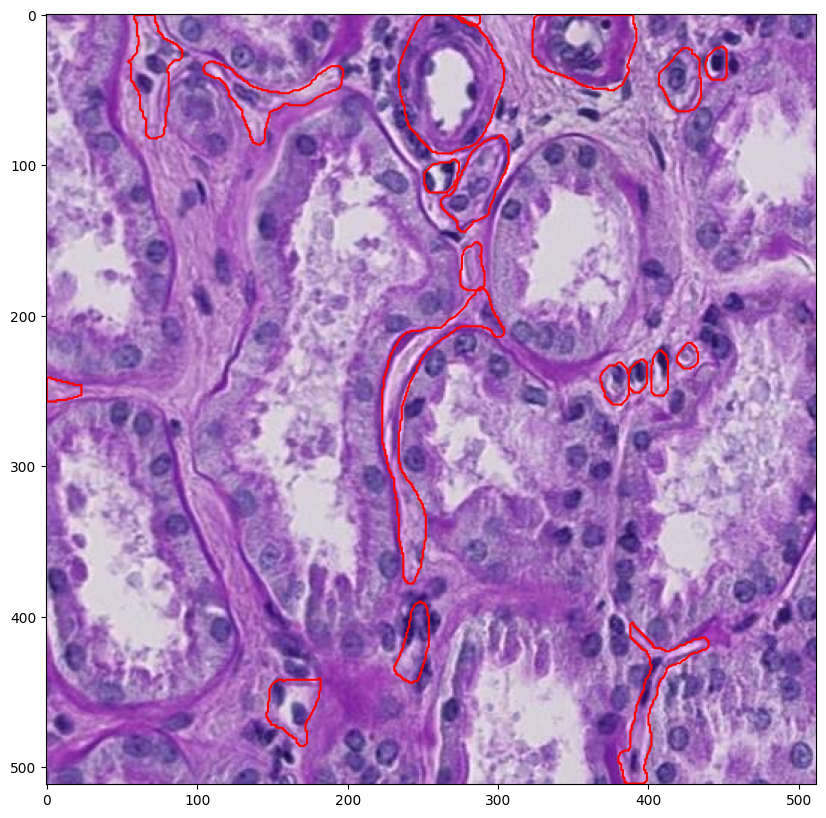

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(img)
for i in d['annotations']:
  if i['type'] == 'blood_vessel':
    coordinates = i['coordinates']
    xs, ys = get_cat_coordinates(coordinates)
    ax.plot(xs, ys, c='red')

fig.show()

Exploring Meta files(CSV) files

In [15]:
wsi_df = pd.read_csv('/content/dataset/wsi_meta.csv')

In [16]:
wsi_df

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


Ref: https://www.kaggle.com/code/yassinealouini/kidney-vascular-eda